# Imports

In [77]:
import plotnine as gg
gg.theme_set(gg.theme_classic)
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt

from Functions import load_real_mouse_data, get_info_from_fullID, add_meta_column

# Directories

In [78]:
base_dir = 'C:/Users/maria/MEGAsync/SLCN'
param_dir = os.path.join(base_dir, 'PShumanData/fitting/mice/')
plot_save_dir = os.path.join(base_dir, 'models/plots/')

In [81]:
winning_model_names = ['Bbspr', 'RLabnp2d']

# Plot model fits

In [79]:
model_fits = pd.read_csv(os.path.join(param_dir, 'plots', 'modelwise_LLS.csv'))
model_fits = model_fits.sort_values(by=['WAIC']).reset_index(drop=True)
model_fits

,model_name,slope_variable,n_subj,WAIC,NLL,AIC
0,Bbspr,age_z,441,113283.234375,54877.617188,113283.234375
1,Bbpr,age_z,441,114983.789062,56168.894531,114983.789062
2,RLabnp2d,age_z,441,114985.679688,54846.839844,114985.679688
3,RLabcpnxd,age_z,441,115192.343750,54509.171875,115192.343750
4,RLabnp2,age_z,441,116227.554688,55908.777344,116227.554688
5,RLabcpd,age_z,441,117820.945312,56705.472656,117820.945312
6,RLabcpnd,age_z,441,117875.875000,56291.937500,117875.875000
7,RLabcd,age_z,441,121151.453125,58811.726562,121151.453125
8,Bbp,age_z,441,122381.203125,60308.601562,122381.203125
9,RLabd,age_z,441,126618.078125,61986.039062,126618.078125


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/WAICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


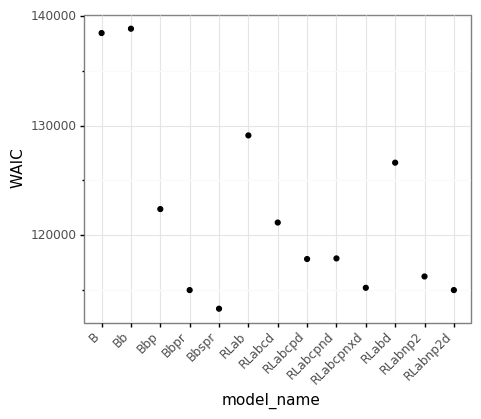

<ggplot: (180683788373)>

In [80]:
g = (gg.ggplot(model_fits, gg.aes('model_name', 'WAIC'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
)
g.save(os.path.join(plot_save_dir, 'WAICs.png'))
g

In [82]:
fits = pd.read_csv(os.path.join(param_dir, 'plots', 'subjwise_LLs.csv'))
fits = fits.drop(columns=['slope_variable', 'n_subj'])
fits

,model_name,n_params,1404012,1404112,1404212,1404312,1404412,1404512,1404612,1404712,...,1307921,1308021,1308121,1308221,1308321,1308521,1308621,1308821,1308921,1309021
0,Bbpr,3,-112.640182,-162.326782,-177.233139,-108.231064,-93.855591,-87.594368,-134.355408,-81.774719,...,-104.604424,-146.953323,-117.427620,-121.947983,-125.024139,-121.756058,-118.311676,-116.432533,-82.904350,-110.510384
1,Bbp,2,-119.533516,-170.643509,-189.441879,-136.604965,-98.989540,-108.717300,-150.144012,-93.355835,...,-108.803879,-159.418335,-124.948067,-134.920441,-125.493095,-128.625443,-126.518272,-128.358459,-93.719070,-126.535973
2,Bbspr,4,-112.292633,-161.386536,-177.197952,-107.505585,-88.357567,-85.240578,-134.250931,-81.458069,...,-102.127281,-146.424667,-116.295288,-118.365829,-121.492844,-116.364899,-117.987236,-115.308762,-79.499084,-105.290993
3,Bb,1,-167.281158,-210.837234,-209.646973,-162.410004,-106.759041,-121.007011,-158.821198,-113.962029,...,-150.661316,-179.919678,-146.718979,-154.373856,-137.214432,-134.994522,-146.756592,-145.636017,-101.713356,-127.113167
4,B,0,-166.017929,-228.963882,-231.676819,-156.075241,-104.334251,-115.901176,-155.076584,-112.512222,...,-146.090988,-181.987366,-141.909729,-147.160080,-134.104675,-129.506073,-139.861603,-139.569641,-100.499100,-120.491882
5,RLabcd,4,-142.308350,-178.334213,-191.168930,-111.351761,-92.549538,-97.742508,-149.254990,-99.438301,...,-106.697945,-165.168213,-116.178185,-120.724228,-133.921906,-118.524750,-123.641663,-121.188522,-81.576317,-109.460274
6,RLabcpd,5,-122.238724,-162.956360,-182.485199,-109.267517,-92.530846,-97.179749,-147.576675,-98.639862,...,-103.257210,-156.758514,-114.407982,-119.937653,-131.479691,-118.414207,-120.972862,-120.155441,-81.551468,-106.449806
7,RLabcpnd,6,-120.551048,-161.898682,-182.116760,-108.835381,-91.949371,-96.676277,-147.498169,-95.402611,...,-103.169411,-155.394928,-114.160309,-119.857101,-126.637070,-117.481812,-120.961876,-118.864265,-80.707275,-106.414238
8,RLabcpnxd,7,-112.861351,-158.859344,-171.712326,-104.741661,-86.437424,-85.891251,-135.308563,-83.771248,...,-96.640511,-148.163956,-108.407944,-117.717155,-123.466019,-117.227829,-117.949539,-107.148636,-80.728897,-99.899612
9,RLabd,3,-147.947662,-207.608459,-192.414383,-113.128235,-94.646301,-108.863083,-149.401657,-99.155632,...,-119.081184,-167.127228,-129.699219,-138.194824,-145.796265,-128.841339,-128.133102,-137.782715,-98.090340,-120.049118


In [97]:
# Melt
fits_ = pd.melt(fits, id_vars=['model_name', 'n_params'], var_name='fullID', value_name='LL')

# Add BIC and AIC
n_trials = 725
for row in range(len(fits_)):
    fits_.loc[row, 'AIC'] = 2 * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']
    fits_.loc[row, 'BIC'] = np.log(n_trials) * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']

# Add animal id, age, gender
animal_colnames = ['fullID', 'agegroup', 'sex', 'age', 'animal']
for col in animal_colnames[1:]:
    fits_[col] = fits_.fullID.apply(get_info_from_fullID, column_name=col)
fits_

,model_name,n_params,fullID,LL,AIC,BIC,agegroup,sex,age,animal
0,Bbpr,3,1404012,-112.640182,231.280365,245.038880,Juvenile,Male,40,14
1,Bbp,2,1404012,-119.533516,243.067032,252.239375,Juvenile,Male,40,14
2,Bbspr,4,1404012,-112.292633,232.585266,250.929953,Juvenile,Male,40,14
3,Bb,1,1404012,-167.281158,336.562317,341.148489,Juvenile,Male,40,14
4,B,0,1404012,-166.017929,332.035858,332.035858,Juvenile,Male,40,14
...,...,...,...,...,...,...,...,...,...,...
5728,RLabcpnxd,7,1309021,-99.899612,213.799225,245.902426,Adult,Female,90,13
5729,RLabd,3,1309021,-120.049118,246.098236,259.856751,Adult,Female,90,13
5730,RLabnp2d,6,1309021,-99.899612,211.799225,239.316255,Adult,Female,90,13
5731,RLabnp2,5,1309021,-108.262032,226.524063,249.454921,Adult,Female,90,13


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/LLs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/BICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\pl

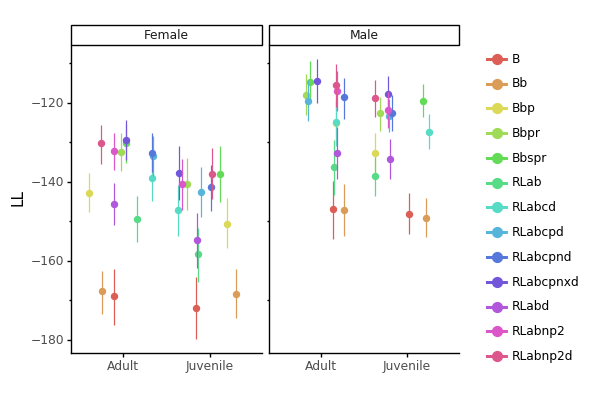

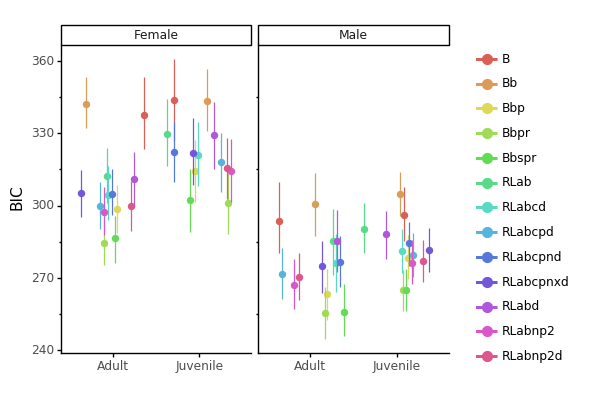

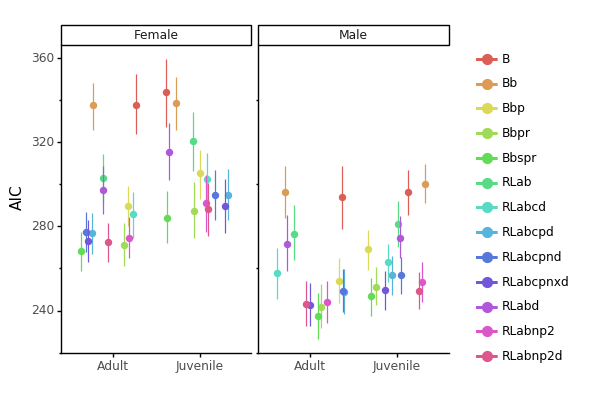

In [94]:
for yax in ['LL', 'BIC', 'AIC']:
    g = (gg.ggplot(fits_, gg.aes('factor(agegroup)', yax, color='model_name'))
     + gg.stat_summary(position='jitter')
     + gg.facet_wrap('~ sex')
     + gg.labs(x='', color='')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, '{}s.png'.format(yax)))

In [103]:
# Get AICs
AICs = fits_.pivot_table(columns='model_name', index=animal_colnames, values='AIC')

for col in AICs.columns:
    if 'RL' in col:
        ref_col = winning_model_names[1]
    elif 'B' in col:
        ref_col = winning_model_names[0]
    elif 'WSLS' in col:
        ref_col = winning_model_names[0]
    AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]
ref_col, col = winning_model_names
AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]

# AIC differences
AICs_rel = AICs.drop(columns=[col for col in AICs.columns if
                              (not 'minus' in col) and (not col=='sex') and (not col=='agegroup')])
AICs_rel = AICs_rel.reset_index()
AICs_rel = AICs_rel.melt(id_vars=animal_colnames, value_name='AIC')
AICs_rel

,fullID,agegroup,sex,age,animal,model_name,AIC
0,1007421,Adult,Female,74,10,B_minus_Bbspr,269.257965
1,1007521,Adult,Female,75,10,B_minus_Bbspr,201.943253
2,1007621,Adult,Female,76,10,B_minus_Bbspr,107.329865
3,1007721,Adult,Female,77,10,B_minus_Bbspr,87.300690
4,1007821,Adult,Female,78,10,B_minus_Bbspr,66.671631
...,...,...,...,...,...,...,...
6169,908421,Adult,Female,84,9,RLabnp2d_minus_Bbspr,-4.677917
6170,908521,Adult,Female,85,9,RLabnp2d_minus_Bbspr,4.966278
6171,908621,Adult,Female,86,9,RLabnp2d_minus_Bbspr,23.547485
6172,908721,Adult,Female,87,9,RLabnp2d_minus_Bbspr,10.663361


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/RelativeAICs2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


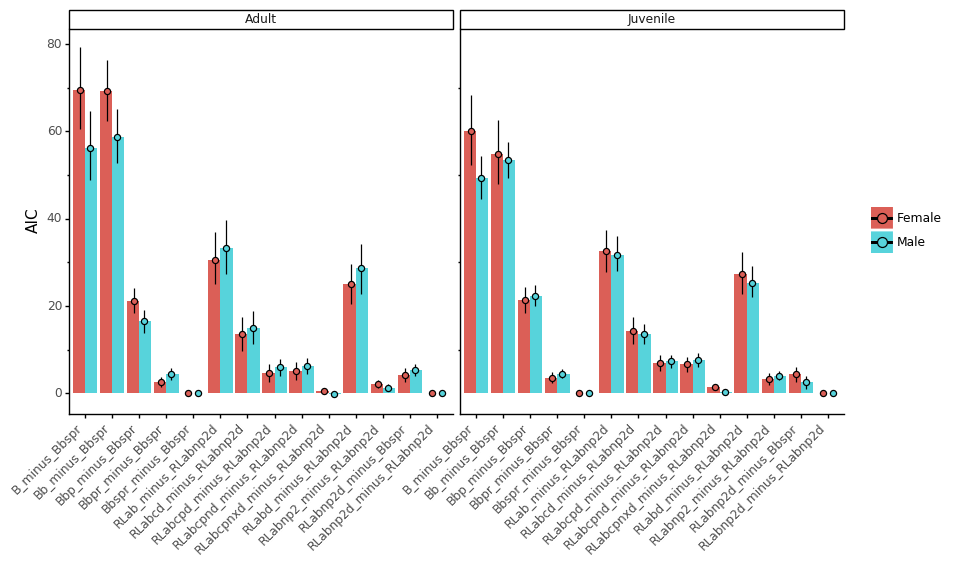

In [104]:
# Plot AIC differences
gg.options.figure_size = (10, 5)
g = (gg.ggplot(AICs_rel, gg.aes('model_name', 'AIC', fill='sex'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(position=gg.position_dodge(width=0.75))
#  + gg.geom_point()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
 + gg.labs(x='', fill='')
 + gg.facet_grid('~ agegroup')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'RelativeAICs2.png'))

# Load fitted parameters

In [65]:
# Load
all_params = pd.DataFrame()
for file in os.listdir(param_dir):
    if ('csv' in file) and ('nll' not in file):
        
        new_params = pd.read_csv(os.path.join(param_dir, file))
        new_params['agegroup'] = new_params.sID.apply(get_info_from_fullID, column_name='agegroup')
        all_params = all_params.append(new_params)

# Preprocess        
all_params['agegroup'] = pd.Categorical(all_params['agegroup'], ordered=True, categories=('Juvenile', 'Adult'))
all_params = all_params.rename(columns={'Gender': 'sex', 'PreciseYrs': 'age'})
all_params['meta'] = add_meta_column(all_params)
all_params = all_params.drop(columns=
                             ['PDS', 'T1', 'cnalpha_rew', 'p_noisy', 'slope_variable', 'treatment', 'fullID', 'age_z'])
all_params = all_params.loc[all_params.meta != 'nan']
all_params.beta /= 15
all_params

,sex,age,agegroup,alpha,animal,beta,bias,calpha,cnalpha,model,nalpha,p_reward,p_switch,persev,sID,session,meta
0,Male,40,Juvenile,NaN,14,0.136739,0.0,NaN,NaN,Bbpr,NaN,0.970901,0.050816,0.548055,1404012,0,1-3
1,Male,41,Juvenile,NaN,14,0.100387,0.0,NaN,NaN,Bbpr,NaN,0.975897,0.050816,0.538238,1404112,1,1-3
2,Male,42,Juvenile,NaN,14,0.098180,0.0,NaN,NaN,Bbpr,NaN,0.986946,0.050816,0.442780,1404212,2,1-3
3,Male,43,Juvenile,NaN,14,0.884532,0.0,NaN,NaN,Bbpr,NaN,0.997228,0.050816,0.442281,1404312,3,4-8
4,Male,44,Juvenile,NaN,14,0.214144,0.0,NaN,NaN,Bbpr,NaN,0.963673,0.050816,0.333919,1404412,4,4-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,Female,79,Adult,0.660146,13,0.288760,0.0,0.0,0.0,RLab,0.660146,NaN,NaN,0.000000,1307921,6,4-8
431,Female,80,Adult,0.782064,13,0.200750,0.0,0.0,0.0,RLab,0.782064,NaN,NaN,0.000000,1308021,7,4-8
432,Female,81,Adult,0.669213,13,0.240629,0.0,0.0,0.0,RLab,0.669213,NaN,NaN,0.000000,1308121,8,9-11
433,Female,82,Adult,0.666629,13,0.267840,0.0,0.0,0.0,RLab,0.666629,NaN,NaN,0.000000,1308221,9,9-11


In [66]:
animal_colnames = ['sID', 'session', 'agegroup', 'sex', 'age', 'animal', 'meta']
all_params_long = pd.melt(all_params, id_vars=animal_colnames + ['model'],
                          var_name='param_name', value_name='param_value')
all_params_long = all_params_long[all_params_long.param_value != 0]
# all_params_long = add_meta_column(all_params_long)
all_params_long

,sID,session,agegroup,sex,age,animal,meta,model,param_name,param_value
0,1404012,0,Juvenile,Male,40,14,1-3,Bbpr,alpha,NaN
1,1404112,1,Juvenile,Male,41,14,1-3,Bbpr,alpha,NaN
2,1404212,2,Juvenile,Male,42,14,1-3,Bbpr,alpha,NaN
3,1404312,3,Juvenile,Male,43,14,4-8,Bbpr,alpha,NaN
4,1404412,4,Juvenile,Male,44,14,4-8,Bbpr,alpha,NaN
...,...,...,...,...,...,...,...,...,...,...
44307,1307921,6,Adult,Female,79,13,4-8,RLabnp2,persev,0.864470
44308,1308021,7,Adult,Female,80,13,4-8,RLabnp2,persev,0.998955
44309,1308121,8,Adult,Female,81,13,9-11,RLabnp2,persev,0.570550
44310,1308221,9,Adult,Female,82,13,9-11,RLabnp2,persev,0.541619


# Plotting functions

In [67]:
def subset_model_data(data, model_name):
    
    win_mod_sub = data.model == model_name
    not_nan_sub = np.invert(np.isnan(data.loc[win_mod_sub, 'param_value']))
    sub_dat = data[np.logical_and(win_mod_sub, not_nan_sub)]

    return sub_dat

# # Example use
# plotted_model_name = winning_model_names[0]
# sub_dat = subset_model_data(all_params_long, plotted_model_name)

In [68]:
def plot_session_params(data, winning_model_name):

    # Plot
    g = (gg.ggplot(sub_dat, gg.aes('session', 'param_value', color='agegroup'))
     + gg.geom_point(alpha=0.5)
     + gg.geom_smooth()
#      + gg.coord_cartesian(xlim=(0, 12))
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
     + gg.labs(y='')
     + gg.facet_grid('sex ~ param_name')
    )
    g.draw()
    save_dir = os.path.join(plot_save_dir, 'ParamsSession_{}.png'.format(winning_model_name))
    print("Saving to {}".format(save_dir))
    g.save(save_dir)
    
# # Example use
# gg.options.figure_size = (5, 4)
# plot_session_params(sub_dat, plotted_model_name)

In [69]:
def plot_meta_params(data, winning_model_name):

    # Plot
    ## Males only
    sub_dat_male = data[data.sex == 'Male']
    g_male = (gg.ggplot(sub_dat_male, gg.aes('meta', 'param_value', fill='agegroup'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge(width=0.9))
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.9))
     + gg.coord_cartesian(ylim=(0, 1))  # adapt for BF (0, 0.8) vs RL (0, 1)
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1),
                legend_position='none')
     + gg.labs(x='', y='')
     + gg.facet_grid('agegroup ~ param_name')
    )
    g_male.draw()
    g_male.save(os.path.join(plot_save_dir, 'ParamsMetaMale_{}.png'.format(winning_model_name)))
    
    ## Females only
    g_female = g_male
    g_female.data = data[data.sex == 'Female']
    g_female.draw()
    g_female.save(os.path.join(plot_save_dir, 'ParamsMetaFemale_{}.png'.format(winning_model_name)))
    
# # Example use
# plot_meta_params(sub_dat, plotted_model_name)

In [73]:
def plot_agegroup_params(data, winning_model_name):

    ## Males only
    sub_dat_male = data[data.sex == 'Male']
    g_m = (gg.ggplot(sub_dat_male, gg.aes('agegroup', 'param_value', fill='agegroup'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge)
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1),
                legend_position='none')
     + gg.coord_cartesian(ylim=(-0.1, 1))
     + gg.labs(x='', y='')
     + gg.facet_grid('meta ~ param_name')
    )
    g_m.draw()
    g_m.save(os.path.join(plot_save_dir, 'ParamsAgegroupMale_{}.png'.format(winning_model_name)))
    
    ## Females only
    g_f = g_m
    g_f.data = data[data.sex == 'Female']
    g_f.draw()
    g_f.save(os.path.join(plot_save_dir, 'ParamsAgegroupFemale_{}.png'.format(winning_model_name)))
    
# # Example use
# plot_agegroup_params(sub_dat, plotted_model_name)

In [74]:
def plot_age_params(data, winning_model_name, file_name_sub=''):

    g = (gg.ggplot(data, gg.aes('age', 'param_value', color='sex'))
     + gg.geom_point()
     + gg.geom_smooth(color='black')
     + gg.facet_grid('sex ~ param_name')
     + gg.labs(x='Age', y='')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, 'ParamsAge_{}{}.png'.format(winning_model_name, file_name_sub)))
    
# # Example use
# plot_age_params(sub_dat, plotted_model_name)

## Plot winning models

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsSession_Bbspr.png


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsSession_Bbspr.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsMetaMale_Bbspr.png
  warn('Filename: {}'.format(filename)

Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsSession_RLabnp2d.png


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsSession_RLabnp2d.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsMetaMale_RLabnp2d.png
  warn('Filename: {}'.format(fil

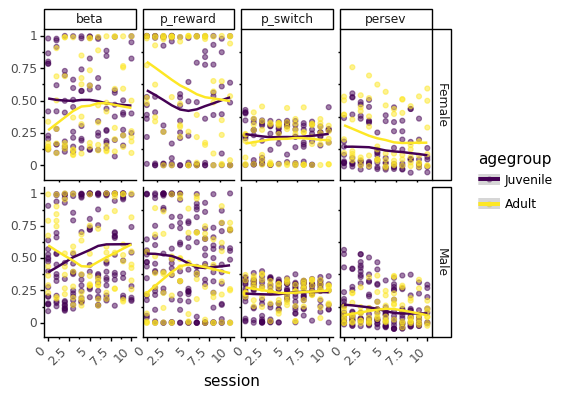

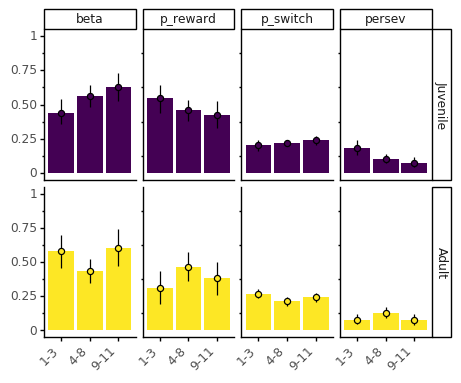

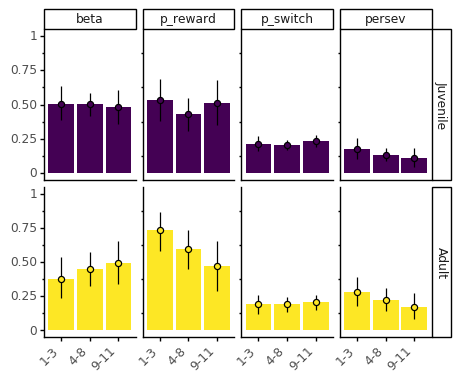

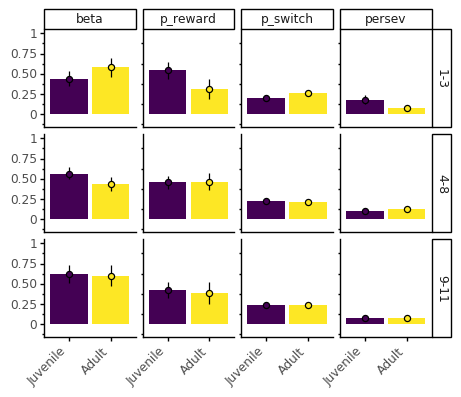

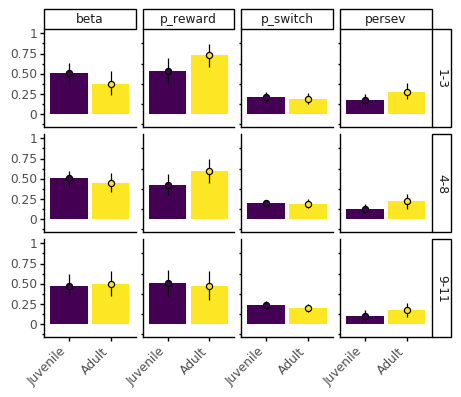

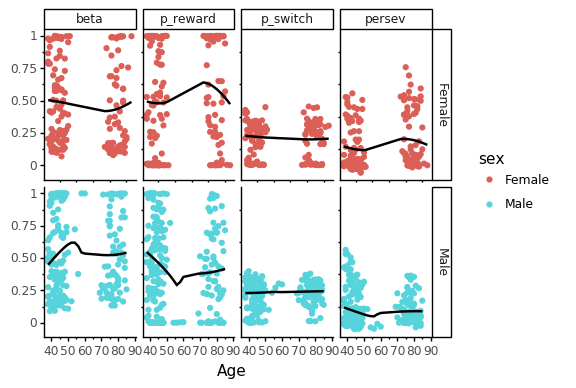

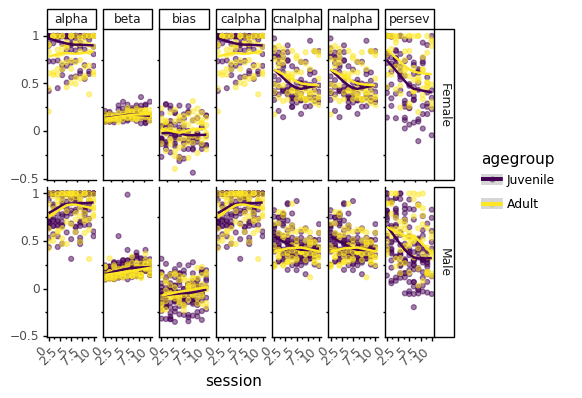

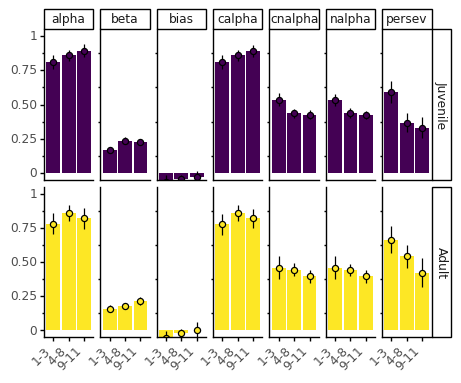

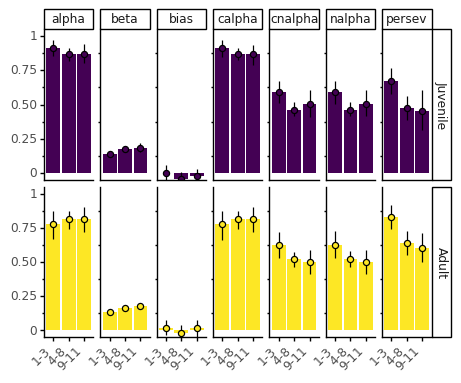

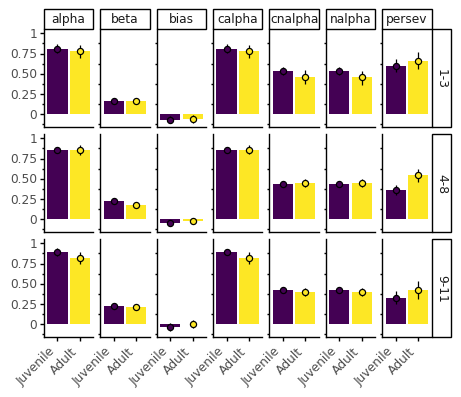

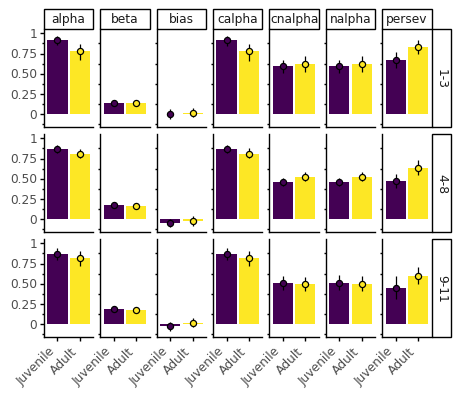

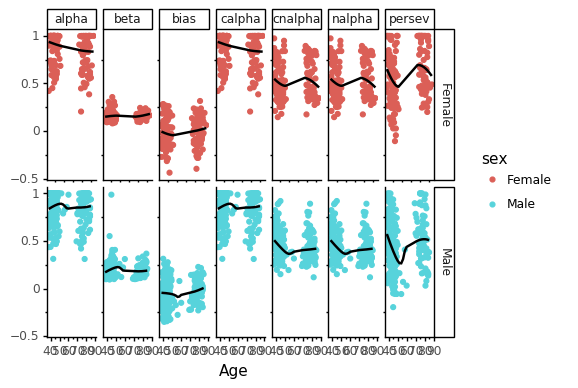

In [76]:
for plotted_model_name in winning_model_names:

    # Subset model data
    win_mod_sub = all_params_long.model == plotted_model_name
    not_nan_sub = np.invert(np.isnan(all_params_long.loc[win_mod_sub, 'param_value']))
    sub_dat = all_params_long[np.logical_and(win_mod_sub, not_nan_sub)]
    
    # Plot
    gg.options.figure_size = (5, 4)
    plot_session_params(sub_dat, plotted_model_name)
    plot_meta_params(sub_dat, plotted_model_name)
    plot_agegroup_params(sub_dat, plotted_model_name)
    plot_age_params(sub_dat, plotted_model_name)

# Parameter correlations between models

In [ ]:
BF_params = all_params[all_params.model == winning_model_names[0]]
RL_params = all_params[all_params.model == winning_model_names[1]]
RL_params

winning_params = RL_params.drop(columns=['model']).merge(
    BF_params.drop(columns=['model']), on=animal_colnames, suffixes=['_RL', '_BF'])
winning_params = winning_params.drop(columns=[
    'alpha_BF', 'calpha_BF', 'cnalpha_BF', 'nalpha_BF', 'p_reward_RL', 'p_switch_RL', 'bias_BF'])
winning_params

In [ ]:
# Compute the correlation matrix
corr = winning_params.drop(columns=['animal', 'fullID', 'sID']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig(os.path.join(plot_save_dir, 'CorrelationMatrix.png'))

## Stats on parameter differences

In [ ]:
import statsmodels.formula.api as smf

all_models = pd.DataFrame()

for param in ['alpha_RL', 'beta_RL', 'bias_RL', 'calpha_RL', 'cnalpha_RL', 'nalpha_RL', 'persev_RL',
              'beta_BF', 'p_reward_BF', 'p_switch_BF', 'persev_BF']:
    mod = smf.ols(
        formula='{} ~ (session + Gender + age_group) * (session + Gender + age_group)'.format(param),
        data=winning_params).fit()
    
    p = pd.DataFrame(mod.pvalues, columns=['p'])
    c = pd.DataFrame(mod.params, columns=['coef'])
    c['param'] = param

    mod_dat = p.merge(c, left_index=True, right_index=True)
    mod_dat
    
    all_models = all_models.append(mod_dat)

all_models['sig'] = ['sig' if p > 0.05 else 'ns' for p in all_models.p]
all_models = all_models.reset_index()
all_models = all_models.replace({
#     'Gender[T.Male]': 'Sex', 'PreciseYrs': 'Age', 'PreciseYrs:Gender[T.Male]': 'Interaction'
#     'Gender[T.Male]': 'Sex', 'session:Gender[T.Male]': 'Interaction'
    'Gender[T.Male]': 'Sex', 'session': 'Session', 'age_group[T.adult]': 'Agegroup',
    'Gender[T.Male]:age_group[T.adult]': 'Sex:Agegroup',
    'session:Gender[T.Male]': 'Session:Sex',
    'session:age_group[T.adult]': 'Session:Agegroup'
})
all_models = all_models.rename(columns={'index': 'effect'})
all_models.effect = pd.Categorical(all_models.effect, ordered=True,
#                                    categories=['Age', 'Sex', 'Interaction', 'Intercept']
#                                    categories=['session', 'Sex', 'Interaction', 'Intercept']
                                   categories=['Session', 'Agegroup', 'Sex',
                                               'Session:Agegroup', 'Session:Sex', 'Sex:Agegroup',
                                               'Intercept']
                                  )
all_models

In [ ]:
g = (gg.ggplot(all_models, gg.aes('param', 'coef', fill='sig', color='sig'))#, color='param'))
     + gg.geom_bar(stat='identity')
     + gg.scale_fill_manual(values=['white', 'darkgrey'])
     + gg.scale_color_manual(values=['lightgrey', 'black'])
     + gg.theme_bw()
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
     + gg.labs(x='')
     + gg.facet_wrap('~ effect', scales='free')
)
g.save(os.path.join(plot_save_dir, 'RegrModels.png'))
g.draw()

# Plot all models

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('PreciseYrs', 'param_value', color='Gender'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.facet_grid('model~param_name')
 + gg.labs(x='Age')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAge.png'))

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('session', 'param_value', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.coord_cartesian(xlim=(0, 12))
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsSession.png'))

In [ ]:
g = (gg.ggplot(all_params_long,
           gg.aes('age_group', 'param_value', fill='Gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
 + gg.theme_bw()
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAgegroup.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.facet_grid('~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.stat_summary()
 + gg.theme_bw()
 + gg.facet_grid('age_group~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession2.png'))

# Gen Rec

## WSLS

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSS

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)